In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

import webbrowser
import requests
from bs4 import BeautifulSoup

In [2]:
df = pd.read_csv('/Users/lysmacbookpro/Desktop/CS Work/W11-12 Final Project/Artemis Official Data/artemis_dataset_release_v0.csv')

In [3]:
df

,art_style,painting,emotion,utterance,repetition
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"She seems very happy in the picture, and you w...",10
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,sadness,This woman has really knotty hands which makes...,10
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"When looking at this woman, I am filled with c...",10
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,contentment,"A woman looking at ease, peaceful, and satisfi...",10
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,awe,She looks like a lady from that past that migh...,10
...,...,...,...,...,...
454679,Cubism,gino-severini_a-dancer-1,awe,the collection and collage of different colors...,48
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,The peaceful reflections of the moonlight on t...,8
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,I can imagine the sailors resting this peacefu...,8
454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment,The steep mountains and the moonlight provide ...,8


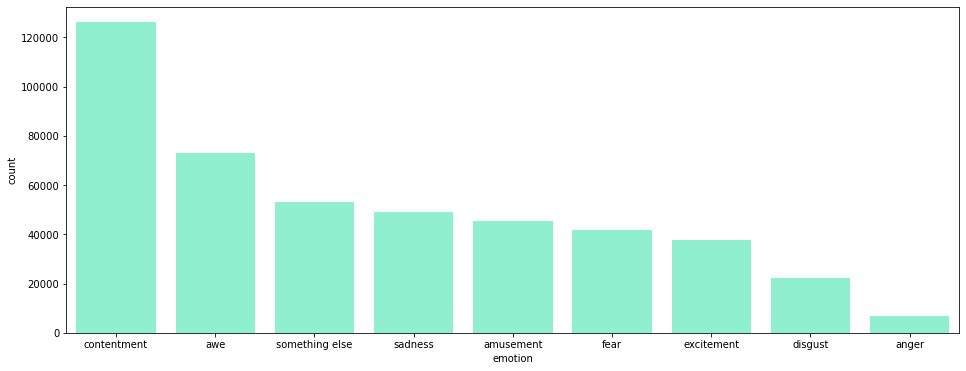

In [4]:
# Distribution of emotional labels
plot = df[['emotion']].value_counts().reset_index().rename(columns={0:'count'})

plt.figure(figsize=(16, 6))
sns.barplot(data=plot,
            x='emotion',
            y='count',
            color='aquamarine')
plt.show()

The dataset is skewed toward positive emotions: 'contentment' and 'awe' make up 43.8%.

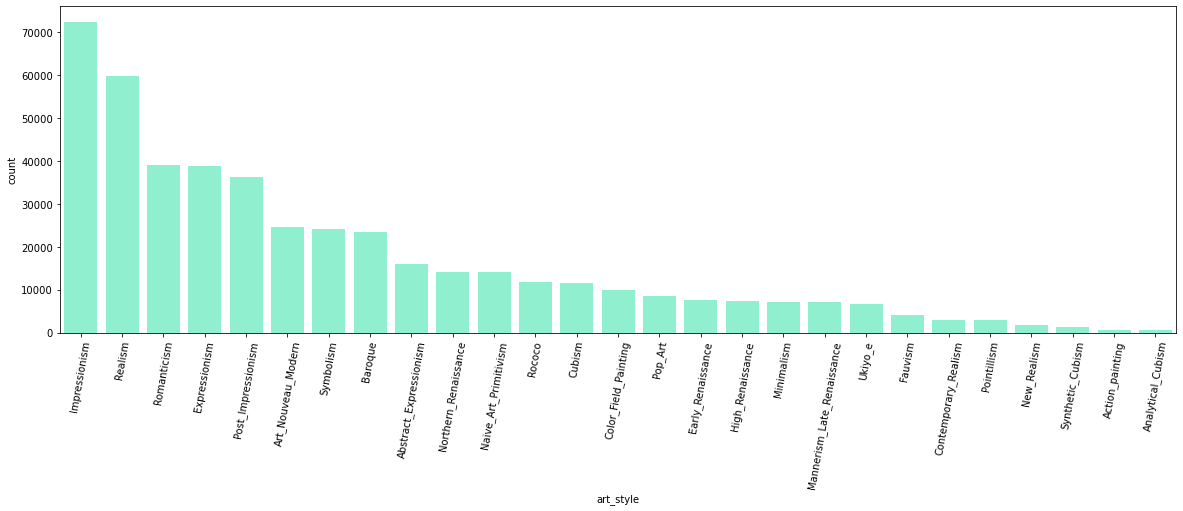

In [11]:
# Distribution of art styles
plot = df['art_style'].value_counts().reset_index().rename(columns={'index': 'art_style', 'art_style':'count'})

plt.figure(figsize=(20,6))
sns.barplot(data=plot,
            x='art_style',
            y='count',
            color='aquamarine')
plt.xticks(rotation=80)
plt.show()

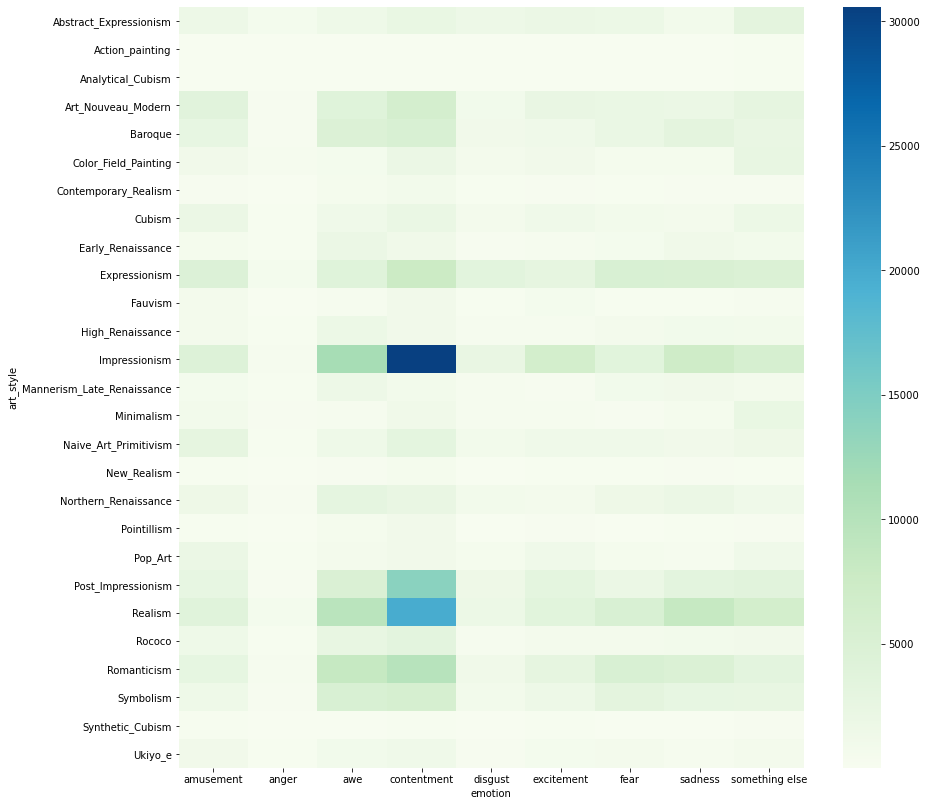

In [12]:
# Pairings of styles & emotions evoked
plot = pd.pivot_table(data=df,
                      index='art_style',
                      columns='emotion',
                      values='painting',
                      aggfunc='count')

plt.figure(figsize=(14,14))
sns.heatmap(data=plot, cmap='GnBu')
plt.show()

In [25]:
# Separate artist name from 'painting' column for further analysis
def get_artist(text):
  return text.split('_')[0]

df['artist'] = df['painting'].apply(get_artist)
print(f"Number of artists in dataset: {df['artist'].nunique()}")

Number of artists in dataset: 1119


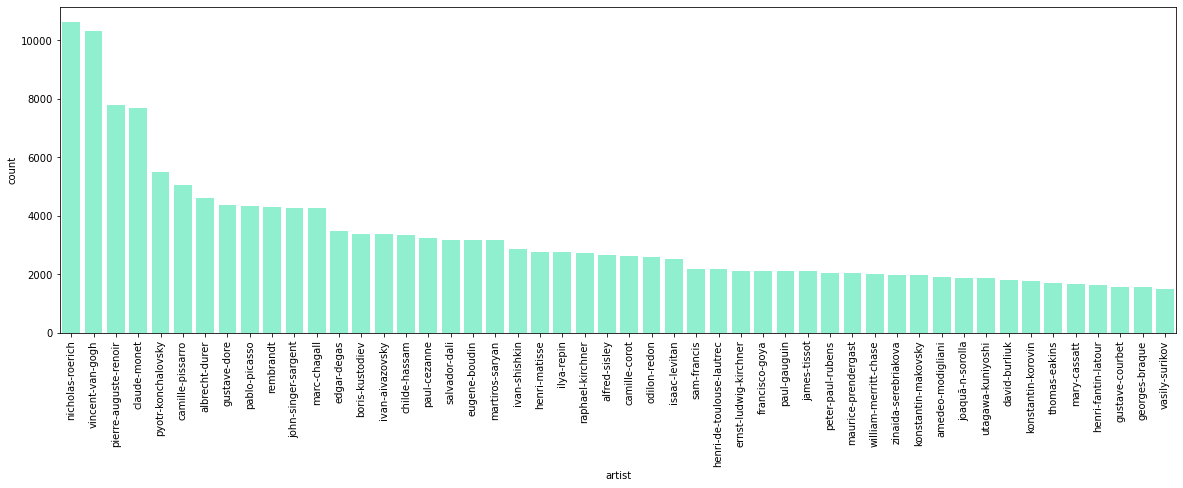

In [14]:
# Top 50 artists with most paintings included in dataset
plot = df['artist'].value_counts().reset_index().rename(columns={'index':'artist', 'artist':'count'}).head(50)

plt.figure(figsize=(20,6))
sns.barplot(data=plot,
              x='artist',
              y='count',
              color='aquamarine')
plt.xticks(rotation=90)
plt.show()

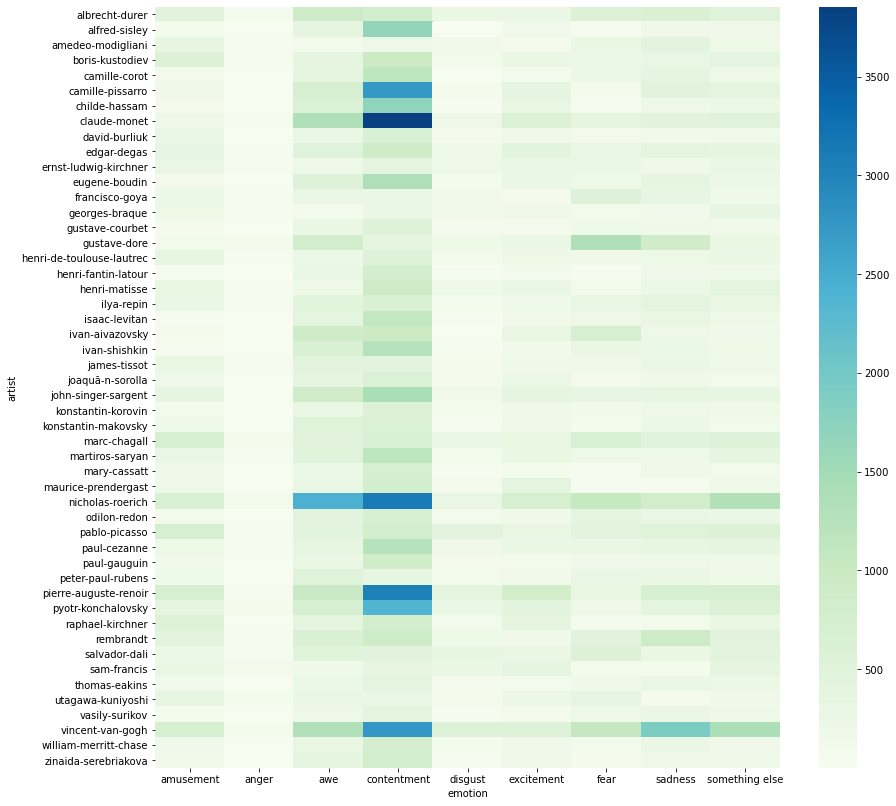

In [15]:
# Pairings of artists & emotions evoked
top50 = df.groupby('artist')['painting'].count().sort_values(ascending=False).head(50).index

top50_df = df[df['artist'].isin(top50)]

plot = pd.pivot_table(data=top50_df,
                      index='artist',
                      columns='emotion',
                      values='painting',
                      aggfunc='count')

plt.figure(figsize=(14,14))
sns.heatmap(data=plot, cmap='GnBu')
plt.show()

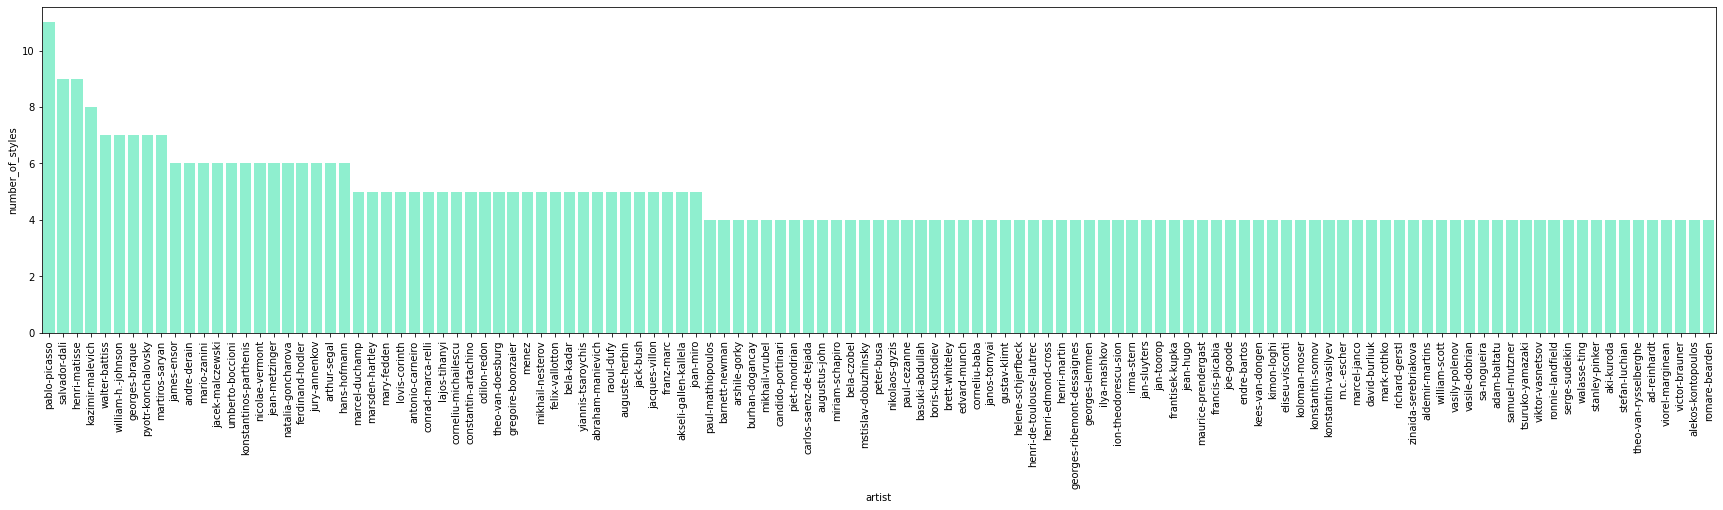

,artist,number_of_styles,art_style
846,pablo-picasso,11,"[Expressionism, Realism, Naive_Art_Primitivism..."
978,salvador-dali,9,"[Realism, Expressionism, Impressionism, Post_I..."
448,henri-matisse,9,"[Expressionism, Post_Impressionism, Realism, A..."
640,kazimir-malevich,8,"[Impressionism, Post_Impressionism, Cubism, Na..."
1083,walter-battiss,7,"[Post_Impressionism, Naive_Art_Primitivism, Ab..."
...,...,...,...
5,ad-reinhardt,4,"[Expressionism, Color_Field_Painting, Syntheti..."
1075,viorel-marginean,4,"[Naive_Art_Primitivism, Expressionism, Fauvism..."
1067,victor-brauner,4,"[Naive_Art_Primitivism, Cubism, Impressionism,..."
37,alekos-kontopoulos,4,"[Post_Impressionism, Expressionism, Realism, C..."


In [16]:
# Most versatile: Atists that blend more than 3 styles
temp = df.groupby('artist')[['art_style']].nunique().reset_index().rename(columns={'art_style':'number_of_styles'})
temp2 = df.groupby('artist')['art_style'].unique().reset_index()

artist_styles = pd.concat([temp, temp2['art_style']], axis=1).sort_values(by='number_of_styles', ascending=False)

plot = artist_styles[artist_styles['number_of_styles']>3]
plt.figure(figsize=(30,6))
sns.barplot(data=plot,
            x='artist',
            y='number_of_styles',
            color='aquamarine')
plt.xticks(rotation=90)
plt.show()
plot

In [26]:
# Artists who evoke all 9 labeled emotions from different annotators
temp = df.groupby('artist')[['emotion']].nunique().reset_index().rename(columns={'emotion':'number_of_emotions'})
temp2 = df.groupby('artist')['emotion'].unique().reset_index()

artist_emotions = pd.concat([temp, temp2['emotion']], axis=1).sort_values(by='number_of_emotions', ascending=False)
artist_emotions[artist_emotions['number_of_emotions']==9]

,artist,number_of_emotions,emotion
559,jimmy-ernst,9,"[excitement, awe, amusement, something else, c..."
713,m.c.-escher,9,"[awe, contentment, sadness, something else, ex..."
693,louis-schanker,9,"[awe, fear, excitement, contentment, disgust, ..."
697,louise-nevelson,9,"[sadness, fear, amusement, contentment, awe, s..."
698,lourdes-castro,9,"[something else, contentment, excitement, amus..."
...,...,...,...
384,geta-bratescu,9,"[amusement, contentment, excitement, sadness, ..."
385,gheorghe-tattarescu,9,"[contentment, awe, amusement, sadness, fear, d..."
348,friedel-dzubas,9,"[amusement, disgust, contentment, something el..."
79,andrea-mantegna,9,"[fear, awe, something else, contentment, excit..."


819 out of 1119 (73.2%) evoke all 9 labeled emotions. This shows how ambiguous artworks generally are in terms of underlying emotions.

In [50]:
# Run to see which emotions are most associated with a chosen word/element (in the context of paintings)

word = input('What word/element to query? ')
print()
print(f"Emotions evoked by the sight of '{word}' include:")
if df[df['utterance'].str.contains(word)].empty:
  print("There are no paintings in the dataset described with these words.")
else:
  print(df[df['utterance'].str.contains(word)]['emotion'].value_counts())
  print()
  emotion = input('Which emotion do you want to see an example of? ')
  if emotion in df[df['utterance'].str.contains(word)]['emotion'].unique():
    print()
    print(f"Example - emotion '{emotion}' evoked by the sight of '{word}':")
    example = df[(df['utterance'].str.contains(word))&(df['emotion']==emotion)].sample()[['painting', 'utterance']]
    artist, painting = example['painting'].iloc[0].split('_')
    desc = example['utterance'].iloc[0]

    r = requests.get('https://wikiart.org/en/'+artist+'/'+painting)
    soup = BeautifulSoup(r.text, 'html.parser')
    img = soup.find('img', {'itemprop':'image'})['src']

    artist = artist.replace('-', ' ').title()
    painting = painting.replace('-', ' ').title()

    print(f'Artist: {artist}')
    print(f'Painting: {painting}')
    print(f"Reason for '{emotion}' by an annotator: {desc}")
    webbrowser.open(img)
  else:
    print("No painting associated with this emotion.") 


Emotions evoked by the sight of 'phone' include:
amusement         40
contentment       28
something else    21
excitement        17
sadness           16
awe               14
fear               4
disgust            4
anger              4
Name: emotion, dtype: int64


Example - emotion 'something else' evoked by the sight of 'phone':
Artist: Leon Bakst
Painting: Fantasy On Modern Costume Atalanta 1912
Reason for 'something else' by an annotator: I see disappointment. The young lady is dressed for going out, but she hangs up the phone with a look of disappointment rather than excitement. Apparently her date has cancelled.
